In [ ]:
from google.colab import drive
drive.mount("/content/drive")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

!pip install -U scikit-learn

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import load_iris
import spacy

%matplotlib inline 

Mounted at /content/drive
     |████████████████████████████████| 22.3MB 128kB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


## Βήμα 1:

In [ ]:
stopWordsList = ['that','it','are','in','as','this','the','with','they','their','and','an','a','at','to','for','by','his','her','is','for','of','in','from','him','on']

def bow_fun(rrange,maxf):
  #bow_vectorizer = CountVectorizer(tokenizer=lambda doc: doc)
  bow_vectorizer = CountVectorizer(max_df=1.0, min_df=1, max_features=maxf,ngram_range=rrange,stop_words=stopWordsList, binary=True, lowercase=False)
  #bow = bow_vectorizer.fit_transform(input_list)
  #return bow , bow_vectorizer.get_feature_names();
  return bow_vectorizer;

def tfidf_fun(rrange):
  tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=100000,ngram_range=rrange,stop_words=stopWordsList, lowercase=False)
  return tfidf_vectorizer;
  #tfidf = tfidf_vectorizer.fit_transform(input_list)
  #return tfidf , tfidf_vectorizer.get_feature_names();

In [ ]:
fakedf = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/TEDe/Fake.csv")
truedf = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/TEDe/True.csv")

#remove whole row, if at least one column has null value
fakedf.replace('', np.nan, inplace=True)
fakedf.dropna(inplace=True)

truedf.replace('', np.nan, inplace=True)
truedf.dropna(inplace=True)


#create a train set and a test set
x=2500  #approx. 10% of each dataset
df1 = fakedf.head(x)
df2 = truedf.head(x)

#add label
df1['label'] = [0 for i in range(df1.shape[0])]
df2['label'] = [1 for i in range(df2.shape[0])]

# concatenate dataframes
frames = [df1, df2]
traindf = pd.concat(frames,ignore_index=True)

# get test dataframe
y=int(3*(x//10))
testTrue = traindf.tail(y)
testFake = traindf.head(y)
testdf = testTrue.append(testFake)

traindf.drop(traindf.head(y).index,inplace=True)
traindf.drop(traindf.tail(y).index,inplace=True)
traindf



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,title,text,subject,date,label
750,WAPO: Trump Planning To Go Around Senate To R...,Donald Trump is very busy right now trying to ...,News,"July 24, 2017",0
751,BREAKING: Desperate GOP Senators Drag John Mc...,"By now, we all know that upon having emergency...",News,"July 24, 2017",0
752,Breaking: Secretary Of State Debates Abandoni...,Donald Trump s horrible decisions and disgusti...,News,"July 24, 2017",0
753,"Donald Trump Whines, Swears And Talks Cocktai...",It s tough sometimes to imagine that Donald Tr...,News,"July 24, 2017",0
754,Buy American? Even Trump’s MAGA Gear Is Sold ...,When Donald Trump kicked off Made in America ...,News,"July 24, 2017",0
...,...,...,...,...,...
4245,"Under Trump, future of U.S. nuclear arsenal sl...",JULIETT-01 MISSILE ALERT FACILITY (Reuters) - ...,politicsNews,"September 14, 2017",1
4246,Democrats say Trump agrees to work on immigrat...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"September 13, 2017",1
4247,"Trump says rich might pay more in taxes, talks...",WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"September 13, 2017",1
4248,Factbox: Trump on Twitter (September 13) - Tax...,The following statements were posted to the ve...,politicsNews,"September 14, 2017",1


##Βήμα 2:

##Ερώτημα α
### Θα χρησιμοποιήσουμε wordclouds για να οπτικοποιήσουμε τους τίτλους των fake και true news. 
####Ωστόσο, τα δεδομένα αυτά (στα συγκεκριμένα ερωτήματα) δεν τα προεπεξεργαζόμαστε διότι έχουν τεράστιο μέγεθος και θα έπαιρνε αρκετές ώρες.

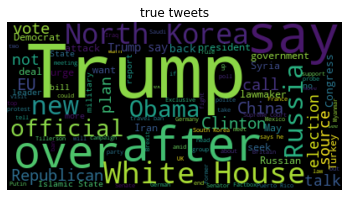

In [ ]:
from wordcloud import WordCloud

#true 
wordcloud = WordCloud( max_words=100,margin=0,stopwords=stopWordsList).generate(" ".join(truedf['title'].tolist()))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("true tweets")
plt.axis("off")
plt.show()


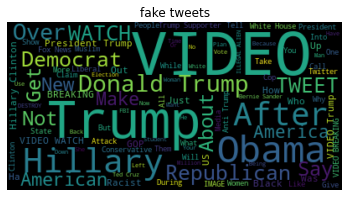

In [ ]:
#fake 
wordcloud = WordCloud( max_words=100,margin=0,stopwords=stopWordsList).generate(" ".join(fakedf['title'].tolist()))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('fake tweets')
plt.axis("off")
plt.show()

##Ερώτημα β

Text(0.5, 1.0, 'Mean of characters in text')

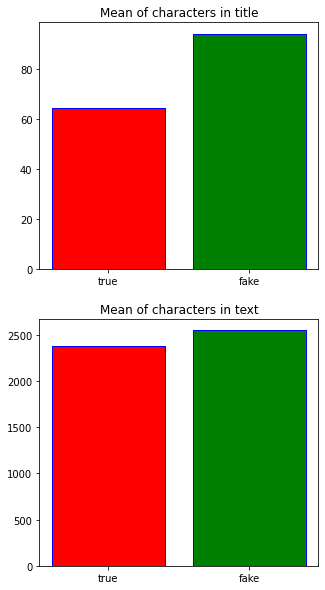

In [ ]:
title_true_mean = truedf['title'].str.len().sum()
title_true_mean /= truedf.shape[0]
title_fake_mean = fakedf['title'].str.len().sum()
title_fake_mean /= fakedf.shape[0]
text_true_mean = truedf['text'].str.len().sum()
text_true_mean /= truedf.shape[0]
text_fake_mean = fakedf['text'].str.len().sum()
text_fake_mean /= fakedf.shape[0]

fig, axs = plt.subplots(2,1,figsize=(5, 10))
y_axis = [title_true_mean,title_fake_mean]
x_axis = ["true", "fake"]
axs[0].bar(x_axis,y_axis,color=['red','green'],edgecolor='blue',width=0.8)
axs[0].set_title("Mean of characters in title")

y_axis = [text_true_mean,text_fake_mean]
x_axis = ["true", "fake"]
axs[1].bar(x_axis,y_axis,color=['red','green'],edgecolor='blue',width=0.8)
axs[1].set_title("Mean of characters in text")

## Eρωτήματα γ,δ

Text(0.5, 1.0, 'sum of words in text after deletion of stop words')

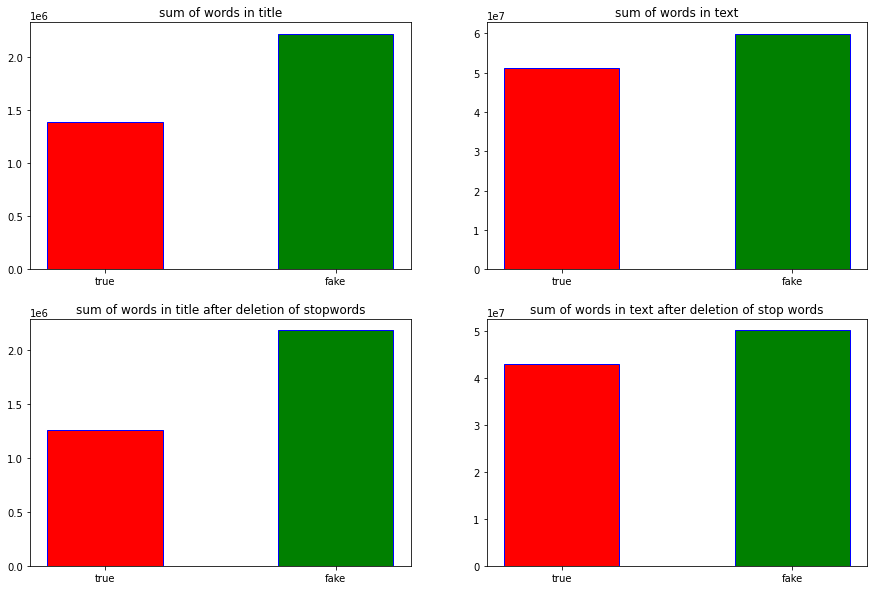

In [ ]:
stopWords = [' that ',' it ',' are ',' in ',' as ',' this ',' the ',' with ',' they ',' their ',' and ',' an ',' a ',' at ',' to ',' for ',' by ',' his ',' her ',' is ',' for ',' of ',' in ',' from ',' him ',' on ']

truetitle=0
faketitle=0
truetext=0
faketext=0

truetitle2=0
faketitle2=0
truetext2=0
faketext2=0
for i in range(truedf.shape[0]):
  temp=truedf.iloc[i]
  truetitle=len(temp['title']) + truetitle
  truetext=len(temp['text']) + truetext


  s=str(temp['title'])
  for i in stopWords:
    s=s.replace(i,"")
  truetitle2=len(s) + truetitle2
  s=str(temp['text'])
  for i in stopWords:
    s=s.replace(i,"")
  truetext2=len(s) + truetext2





for i in range(fakedf.shape[0]):
  temp=fakedf.iloc[i]
  faketitle=len(temp['title']) + faketitle
  faketext=len(temp['text']) + faketext


  s=str(temp['title'])
  for i in stopWords:
    s=s.replace(i,"")
  faketitle2=len(s) + faketitle2
  s=str(temp['text'])
  for i in stopWords:
    s=s.replace(i,"")
  faketext2=len(s) + faketext2





fig, axs = plt.subplots(2,2,figsize=(15, 10))
y_axis = [truetitle,faketitle]
x_axis = ["true", "fake"]
axs[0][0].bar(x_axis,y_axis,color=['red','green'],edgecolor='blue',width=0.5)
axs[0][0].set_title("sum of words in title")

y_axis = [truetext,faketext]
x_axis = ["true", "fake"]
axs[0][1].bar(x_axis,y_axis,color=['red','green'],edgecolor='blue',width=0.5)
axs[0][1].set_title("sum of words in text")

y_axis = [truetitle2,faketitle2]
x_axis = ["true", "fake"]
axs[1][0].bar(x_axis,y_axis,color=['red','green'],edgecolor='blue',width=0.5)
axs[1][0].set_title("sum of words in title after deletion of stopwords")

y_axis = [truetext2,faketext2]
x_axis = ["true", "fake"]
axs[1][1].bar(x_axis,y_axis,color=['red','green'],edgecolor='blue',width=0.5)
axs[1][1].set_title("sum of words in text after deletion of stop words")





##Ερώτημα ε

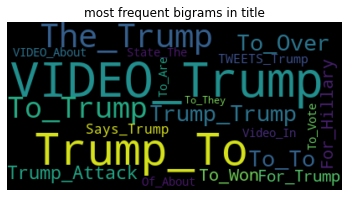

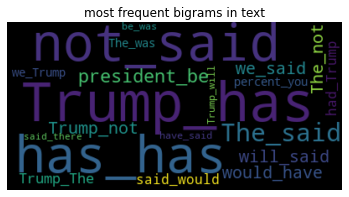

Most frequent bigrams in title as a list:
['White House' 'North Korea' 'Donald Trump' 'President Trump' 'Trump says'
 'Supreme Court' 'Hillary Clinton' 'Trump Is' 'And It' 'Islamic State'
 'In The' 'Fox News' 'Of The' 'To Be' 'On The' 'Bernie Sanders'
 'Anti Trump' 'Ted Cruz' 'For Trump' 'Puerto Rico']
Most frequent bigrams in title as a list:
['Donald Trump' 'has been' 'United States' 'have been' 'would be'
 'White House' 'will be' 'more than' 'did not' 'Featured image'
 'President Donald' 'WASHINGTON Reuters' 'Hillary Clinton' 'image via'
 'Barack Obama' 'Trump has' 'New York' 'had been' 'should be' 'was not']


In [ ]:
stopWordsList = ['that','it','are','in','as','this','the','with','they','their','and','an','a','at','to','for','by','his','her','is','for','of','in','from','him','on','he','to']



from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

def bigram_title(df):
  c_vec = bow_fun((2,2),10000)
  ngrams = c_vec.fit_transform(df['title'])
  count_values=ngrams.toarray()
  count_values = count_values.sum(axis=0)
  vocab = c_vec.vocabulary_

  df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
              ).rename(columns={0: 'frequency', 1:'bigram'})

  return df_ngram



def bigram_text(df):
  c_vec = bow_fun((2,2),10000)
  ngrams = c_vec.fit_transform(df['text'])
  count_values=ngrams.toarray()
  count_values = count_values.sum(axis=0)
  vocab = c_vec.vocabulary_

  df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
              ).rename(columns={0: 'frequency', 1:'bigram'})

  return df_ngram

whole=truedf.append(fakedf)


dftitle=bigram_title(whole)
wordcloud = WordCloud( max_words=20,margin=0,stopwords=stopWordsList).generate("_".join(dftitle['bigram'].tolist()))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('most frequent bigrams in title')
plt.axis("off")
plt.show()
#dftrue=bigram_title(truedf)
#print(dftrue)
#dffake=bigram_title(fakedf)
#dftrue=dftrue.append(dffake)
#dftrue.sort_values(by=['frequency','bigram'])
dftext=bigram_text(whole)
wordcloud = WordCloud( max_words=20,margin=0,stopwords=stopWordsList).generate("_".join(dftext['bigram'].tolist()))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('most frequent bigrams in text')
plt.axis("off")
plt.show()
print("Most frequent bigrams in title as a list:")
print(dftitle['bigram'].head(20).values)
print("Most frequent bigrams in title as a list:")
print(dftext['bigram'].head(20).values)
#print(dftrue)
#print(dffake)

### Ακολουθούν 2 συναρτήσεις που παράγουν τον BoW και tf-idf πίνακα. 

## Βήμα 3:

### Εδώ γίνεται η προεπεξεργασία των δεδομένων 

In [ ]:
counter = 0
nlp = spacy.load("en_core_web_sm")
stopSet = {'.', ',', '-', '!', '@', '#', '$', '%', '%', '%', '^','&','*','(',')','_','+','=','\'','\"',':','—','–', ';','?'}
def text_processing(x):
  x = x.lower()
  spaced = nlp(x)
  x = ""
  for token in spaced:
    if token.is_stop == False and not token.lemma_ in stopSet:
      x += str(token.lemma_+' ')
  global counter
  print(counter)
  counter+=1
  return x

def df_processing(df):
  #df.title = df.title.apply(lambda x: text_processing(x) )
  df.text = df.text.apply(lambda x: text_processing(x) )
  return df

preproc_traindf = df_processing(traindf)
preproc_testdf = df_processing(testdf)

Streaming output truncated to the last 5000 lines.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264

In [ ]:
import gensim

#download once if needed
!wget https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz

#load pre trained model
w2v_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

--2021-06-17 18:05:27--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.68.182
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.68.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  16.1MB/s    in 98s     

2021-06-17 18:07:06 (16.0 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn import svm
from sklearn.experimental import enable_halving_search_cv # noqa
from sklearn.model_selection import GridSearchCV, HalvingRandomSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

def word2vec_Fun(df):
  x = list()
  wlist = df['text'].apply(lambda x: x.split()).values 
  for phrase in wlist:
    doc = [word for word in phrase if word in w2v_model.vocab]
    x.append(np.mean(w2v_model[doc], axis=0))
  x_arr = np.array(x)
  return x_arr


def classify(traindf,testdf,vectorizer,model,modelname,metric):
  if vectorizer == "bow":
    vect = bow_fun((1,2),100000)
  elif vectorizer == "tfidf":
    vect = tfidf_fun((1,2))
  elif vectorizer != "word2vec":
    print("Please give valid vectorizer!")
    return 0;

  if vectorizer == "word2vec":
    x_train = word2vec_Fun(preproc_traindf)
    x_test = word2vec_Fun(preproc_testdf)
  else:
    train_list = traindf['text'].tolist()
    test_list = testdf['text'].tolist()
    x_train = vect.fit_transform(train_list)
    x_test = vect.transform(test_list)

  y_train = traindf['label'].to_numpy()
  y_test = testdf['label'].to_numpy()

  ## we need to use scaler if w2v is used and Naive Bayes for clasify
  ## to fit them in [0,1], because multinomialNB cannot handle negative values
  if modelname == "NB" and vectorizer == "word2vec":
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
  
  if modelname == "svm":
    param_grid = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
    ]
    svc = svm.SVC()
    clf = HalvingRandomSearchCV(svc, param_grid, n_jobs=-1)
    clf.fit(x_train, y_train)
    prediction = clf.predict(x_test)
  elif modelname == "randomForest":
    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(x_train, y_train)
    prediction = clf.predict(x_test)
  else:
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)

  if metric == "F1 score":
    accuracy = f1_score(y_test, prediction)
  elif metric == "Accuracy":
    accuracy = accuracy_score(y_test,prediction)
  else:
    print("Please give valid accuracy metric!")
    return 0;

  return accuracy;


In [ ]:
### logistic regression

acc = classify(preproc_traindf,preproc_testdf,"bow",LogisticRegression(),"","Accuracy")
print("logistic reg, bow, Accuracy: "+str(acc))
acc = classify(preproc_traindf,preproc_testdf,"bow",LogisticRegression(),"","F1 score")
print("logistic reg, bow, F1 score: "+str(acc))
acc = classify(preproc_traindf,preproc_testdf,"tfidf",LogisticRegression(),"","Accuracy")
print("logistic reg, tf-idf, Accuracy: "+str(acc))
acc = classify(preproc_traindf,preproc_testdf,"tfidf",LogisticRegression(),"","F1 score")
print("logistic reg, tf-idf, F1 score: "+str(acc))
acc = classify(preproc_traindf,preproc_testdf,"word2vec",LogisticRegression(),"","Accuracy")
print("logistic reg, word2vec, Accuracy: "+str(acc))
acc = classify(preproc_traindf,preproc_testdf,"word2vec",LogisticRegression(),"","F1 score")
print("logistic reg, word2vec, F1 score: "+str(acc))

logistic reg, bow, Accuracy: 0.998
logistic reg, bow, F1 score: 0.9980013324450367
logistic reg, tf-idf, Accuracy: 0.9733333333333334
logistic reg, tf-idf, F1 score: 0.9733688415446071
logistic reg, word2vec, Accuracy: 0.972
logistic reg, word2vec, F1 score: 0.9719626168224299


In [ ]:
### Naive Bayes
acc = classify(preproc_traindf,preproc_testdf,"bow",MultinomialNB(),"","Accuracy")
print("Naive Bayes, bow, Accuracy: "+str(acc))
acc = classify(preproc_traindf,preproc_testdf,"bow",MultinomialNB(),"","F1 score")
print("Naive Bayes, bow, F1 score: "+str(acc))
acc = classify(preproc_traindf,preproc_testdf,"tfidf",MultinomialNB(),"","Accuracy")
print("Naive Bayes, tf-idf, Accuracy: "+str(acc))
acc = classify(preproc_traindf,preproc_testdf,"tfidf",MultinomialNB(),"","F1 score")
print("Naive Bayes, tf-idf, F1 score: "+str(acc))
acc = classify(preproc_traindf,preproc_testdf,"word2vec",MultinomialNB(),"NB","Accuracy")
print("Naive Bayes, word2vec, Accuracy: "+str(acc))
acc = classify(preproc_traindf,preproc_testdf,"word2vec",MultinomialNB(),"NB","F1 score")
print("Naive Bayes, word2vec, F1 score: "+str(acc))

Naive Bayes, bow, Accuracy: 0.9853333333333333
Naive Bayes, bow, F1 score: 0.9851951547779273
Naive Bayes, tf-idf, Accuracy: 0.946
Naive Bayes, tf-idf, F1 score: 0.9461794019933555
Naive Bayes, word2vec, Accuracy: 0.8986666666666666
Naive Bayes, word2vec, F1 score: 0.8958904109589041


In [ ]:
acc = classify(preproc_traindf,preproc_testdf,"bow",0,"svm","Accuracy")
print(", bow, Accuracy: "+str(acc))
acc = classify(preproc_traindf,preproc_testdf,"bow",0,"svm","F1 score")
print("svm, bow, F1 score: "+str(acc))
acc = classify(preproc_traindf,preproc_testdf,"tfidf",0,"svm","Accuracy")
print("svm, tf-idf, Accuracy: "+str(acc))
acc = classify(preproc_traindf,preproc_testdf,"tfidf",0,"svm","F1 score")
print("svm, tf-idf, F1 score: "+str(acc))
acc = classify(preproc_traindf,preproc_testdf,"word2vec",0,"svm","Accuracy")
print("svm, word2vec, Accuracy: "+str(acc))
acc = classify(preproc_traindf,preproc_testdf,"word2vec",0,"svm","F1 score")
print("svm, word2vec, F1 score: "+str(acc))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 12 is smaller than n_iter=175. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


, bow, Accuracy: 0.998


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 12 is smaller than n_iter=175. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


svm, bow, F1 score: 0.9980013324450367


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 12 is smaller than n_iter=175. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


svm, tf-idf, Accuracy: 0.9926666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 12 is smaller than n_iter=175. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


svm, tf-idf, F1 score: 0.9926715522984677


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 12 is smaller than n_iter=175. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


svm, word2vec, Accuracy: 0.988


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 12 is smaller than n_iter=175. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


svm, word2vec, F1 score: 0.9873754152823921


In [ ]:
### Random forest
acc = classify(preproc_traindf,preproc_testdf,"bow",0,"randomForest","Accuracy")
print("randomForest, bow, Accuracy: "+str(acc))
acc = classify(preproc_traindf,preproc_testdf,"bow",0,"randomForest","F1 score")
print("randomForest, bow, F1 score: "+str(acc))
acc = classify(preproc_traindf,preproc_testdf,"tfidf",0,"randomForest","Accuracy")
print("randomForest, tf-idf, Accuracy: "+str(acc))
acc = classify(preproc_traindf,preproc_testdf,"tfidf",0,"randomForest","F1 score")
print("randomForest, tf-idf, F1 score: "+str(acc))
acc = classify(preproc_traindf,preproc_testdf,"word2vec",0,"randomForest","Accuracy")
print("randomForest, word2vec, Accuracy: "+str(acc))
acc = classify(preproc_traindf,preproc_testdf,"word2vec",0,"randomForest","F1 score")
print("randomForest, word2vec, F1 score: "+str(acc))

randomForest, bow, Accuracy: 0.974
randomForest, bow, F1 score: 0.9742233972240583
randomForest, tf-idf, Accuracy: 0.9953333333333333
randomForest, tf-idf, F1 score: 0.9953239812959251
randomForest, word2vec, Accuracy: 0.906
randomForest, word2vec, F1 score: 0.9051782111634162


### Παρατηρήσεις-σχόλια:
### - Για training χρησιμοποιούμε περίπου το 70% και για test set το 30% των συνολικών δεδομένων.
### - Η γραμμική παλινδρόμηση αποτελεί έναν καλό αλγόριρθμο ταξινόμησης κειμένου, ο οποίος έχει καλή χρονική απόδοση και βγάζει καλά αποτελέσματα διότι έχει εφαρμογή σε προβλήματα πολλών διαστάσεων αφού δεν υπολογίζει πυκνότητες ή απόσταση στο χώρο και μπορεί να διαχειριστεί άσχετα, περιττά και συνεργαζόμενα χαρακτηριστικά.
### - Ο Naive Bayes αλγόριθμος αποτελεί έναν επίσης κλασικό αλγόριθμο ταξινόμησης κειμένου με καλά και γρήγορα αποτελέσματα στις πολλές διαστάσεις. Χρησιμοποιούμε τον Multinomial Naive Bayes, ιδανικός για διακριτά δεδομένα.
### - Η ταξινόμηση με τη χρήση SVM έχει πολύ καλά αποτελέσματα, αρκεί να βρεθούν οι κατάλληλες παράμετροι, το οποίο μπορεί να χρειαστεί κάποιους πειραματισμούς και χρόνο στην αρχή, αλλά αφού βρεθούν τα αποτελέσματα θα είναι σχεδόν αψεγάδιαστα και πολύ κοντά στην πραγματικότητα.
### - Ο αλγόριθμος ταξινόμησης random forest είναι ιδανικός για υψηλών διαστάσεων θορυβώδη ταξινόμηση κειμένου.

###-Ωστόσο, παρατηρούμε ότι κάποιες μέθοδοι ταξινόμησης αποδίδουν καλύτερα αν δώσουμε σαν είσοδο έναν συγκεκριμένο πίνακα που προκύπτει είτε από BoW είτε από Tf Idf είτε από word2vec. Βέβαια, κάποιοι αλγόριθμοι δεν εξαρτώνται σε μεγάλο βαθμό όπως οι svm και λιγότερο ο logistic regression(αν και βγάζει σχεδόν άριστα αποτελέσματα για τον BoW). Ο Naive Bayes αποδίδει τέλεια για BoW, ενώ πέφτει η απόδοση για τα word2vec,  επειδή κάνουμε scaling για την εξάλειψη των αρνητικών τιμών, χρησιμοποιώντας τον minMax. Το random Forest έχει απόδοση που πλησιάζει το 1.0(99.5%) χρησιμοποιώντας tf idf ενώ πάλι πέφτει η απόδοση με τον word2vec. Γενικά μπορούμε να συμπεράνουμε ότι το κάθε μοντέλο ενδέχεται να βγάζει διαφορετικά αποτελέσματα ανάλογα με την μέθοδο που χρησιμοποιούμε(bow,tf-idf,w2v). Οι μέθοδοι bow και tf-idf είναι κοντά στα αποτελέσματα, το οποίο και είναι λογικό αφού η μόνη τους διαφορά είναι ότι ο tf idf λαμβάνει υπόψιν και πόσο "κοινή" είναι μια λέξη σε όλα τα δεδομένα. O word2vec για κάποιους αλγόριθμους ταξινόμησης έχει ικανοποιητικά αποτελέσματα, ενώ σε άλλα χάνει έδαφος μπροστά στις προηγούμενες 2 μεθόδους. Ίσως, αν γινόταν εξειδικευμένο training στο μοντέλο ή έπειτα από ενδελεχή έρευνα χρησιμοποιούσαμε άλλο εξειδικευμένο μοντέλο για το w2v να έβγαζε καλύτερα ενδεχομένως αποτελέσματα, αλλά με κάποιες δοκιμές που κάναμε αυτό ήταν ένα ικανοποιητικό μοντέλο που χρησιμοποιήσαμε.

##Bonus:
### κάναμε προσπάθεια εξ'αρχής για να βγάζουμε καλά αποτελέσματα και ειδικά ο svm με bow/tf-idf και ο randomForest με tf-idf βγάζουν αποτελέσματα πάνω από 99.2% και 99.8% αντίστοιχα. Κάνουμε προεπεξεργασία στα δεδομένα, ψάξαμε λίγο παραπάνω για την βελτιστοποίηση των παραμέτρων στον svm σε καλό χρονικό διάστημα και αναζητήσαμε καλό μοντέλο για το w2v.